In [82]:
!pip3 install folium


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import font_manager, rc
import json
import folium
df = pd.read_csv('./camping_loc.csv', encoding='cp949' )
geo_path = './TL_SCCO_CTPRVN.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [84]:
df.head()

,캠핑(야영)장명,캠핑(야영)장구분,위도,경도,주소,일반야영장수,자동차야영장,글램핑,카라반,화장실,샤워실,개수대,소화기,방화수,방화사,화재감지기,기타부대시설 1,기타부대시설 2,데이터기준일자,인허가일자
0,최남단글램핑,자동차야영장,33.211782,126.255925,제주특별자치도 서귀포시 최남단해안로 113-0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2019.7.12,2016.6.10
1,서건도카라반,카라반,33.232536,126.500192,제주특별자치도 서귀포시 이어도로 826-51,0,0,0,4,0,0,0,4,0,0,4,"전기,온수,물놀이장,놀이터",NaN,2019.7.12,2016.2.3
2,돌고래 하우스 카라반,일반야영장,33.232731,126.499400,제주특별자치도 서귀포시 강정동 이어도로 826-58,0,0,0,0,0,0,0,0,0,0,0,전기,NaN,2019.7.12,2015.6.5
3,햇살정원 제주캠핑&민박,일반야영장,33.240415,126.608152,제주특별자치도 서귀포시 보목동 보목포로65번길 6,4,0,0,0,1,1,1,5,0,0,0,"전기,무선인터넷,장작판매,온수",NaN,2019.7.12,2015.5.22
4,쇠소깍오토파크,일반야영장,33.249539,126.614507,제주특별자치도 서귀포시 하효동,0,0,0,0,0,0,0,0,0,0,0,"전기,온수",NaN,2019.7.12,2015.12.31


In [85]:
df2 = df.filter(['주소', '일반야영장수', '위도', '경도'])
df2

,주소,일반야영장수,위도,경도
0,제주특별자치도 서귀포시 최남단해안로 113-0,0,33.211782,126.255925
1,제주특별자치도 서귀포시 이어도로 826-51,0,33.232536,126.500192
2,제주특별자치도 서귀포시 강정동 이어도로 826-58,0,33.232731,126.499400
3,제주특별자치도 서귀포시 보목동 보목포로65번길 6,4,33.240415,126.608152
4,제주특별자치도 서귀포시 하효동,0,33.249539,126.614507
...,...,...,...,...
2286,강원도 고성군 현내면 모정2길 2,0,38.470144,128.420107
2287,강원 고성군 현내면 명파4길 47,0,38.543611,128.405619
2288,경기도 포천시 이동면 도평리 272-3,0,38.766079,127.379209
2289,충남 공주시 반포면 학봉리 335,0,124.000000,3452.000000


In [86]:
map_osm = folium.Map(location=[38.011952, 128.542213], zoom_start=10)
map_osm

In [87]:
for i in df2.index:
    # 행 우선 접근 방식으로 값 추출하기
    adr = df2.loc[i, '주소']
    lat = df2.loc[i, '위도']
    lng = df2.loc[i, '경도']
    marker= folium.Marker([lat, lng], popup=adr).add_to(map_osm)
    
map_osm.save('야영장.html')
map_osm

In [88]:
df3 = df2.query("일반야영장수 >= 1 and 주소.str.contains('제주')")
sum_3 = df3["일반야영장수"].sum()
sum_3

192

In [89]:
df4 = df2.query("일반야영장수 >= 1 and 주소.str.contains('강원')")
sum_4 = df4["일반야영장수"].sum()
sum_4

7340

In [90]:
df5 = df2.query("일반야영장수 >= 1 and 주소.str.contains('경기')")
sum_5 = df5["일반야영장수"].sum()
sum_5

8413

In [91]:
df6 = df2.query("일반야영장수 >= 1 and 주소.str.contains('전라북')")
sum_6 = df6["일반야영장수"].sum()
sum_6

1106

In [92]:
df7 = df2.query("일반야영장수 >= 1 and 주소.str.contains('전라남')")
sum_7 = df7["일반야영장수"].sum()
sum_7

877

In [93]:
df8 = df2.query("일반야영장수 >= 1 and 주소.str.contains('충청북')")
sum_8 = df8["일반야영장수"].sum()
sum_8

2072

In [94]:
df9 = df2.query("일반야영장수 >= 1 and 주소.str.contains('충청남')")
sum_9 = df9["일반야영장수"].sum()
sum_9

1432

In [95]:
df10 = df2.query("일반야영장수 >= 1 and 주소.str.contains('경상북')")
sum_10 = df10["일반야영장수"].sum()
sum_10

3413

In [96]:
df11 = df2.query("일반야영장수 >= 1 and 주소.str.contains('경상남')")
sum_11 = df11["일반야영장수"].sum()
sum_11

1701

In [97]:
df12 = df2.query("일반야영장수 >= 1 and 주소.str.contains('서울')")
sum_12 = df12["일반야영장수"].sum()
sum_12

315

In [98]:
sum_list = [sum_3, sum_4, sum_5, sum_6, sum_7, sum_8, sum_9, sum_10, sum_11, sum_12]

In [99]:
adr_list = ["제주도", "강원도", "경기도", "전라북도", "전라남도", "충청북도", "충청남도", "경상북도", "경상남도", "서울시"]

In [100]:
data = {"일반야영장수" : sum_list,
       "주소" : adr_list}

In [101]:
data

{'일반야영장수': [192, 7340, 8413, 1106, 877, 2072, 1432, 3413, 1701, 315],
 '주소': ['제주도',
  '강원도',
  '경기도',
  '전라북도',
  '전라남도',
  '충청북도',
  '충청남도',
  '경상북도',
  '경상남도',
  '서울시']}

In [102]:
frame = pd.DataFrame(data)

In [103]:
frame

,일반야영장수,주소
0,192,제주도
1,7340,강원도
2,8413,경기도
3,1106,전라북도
4,877,전라남도
5,2072,충청북도
6,1432,충청남도
7,3413,경상북도
8,1701,경상남도
9,315,서울시


In [104]:
rc('font', family='gulim')
x_value = []

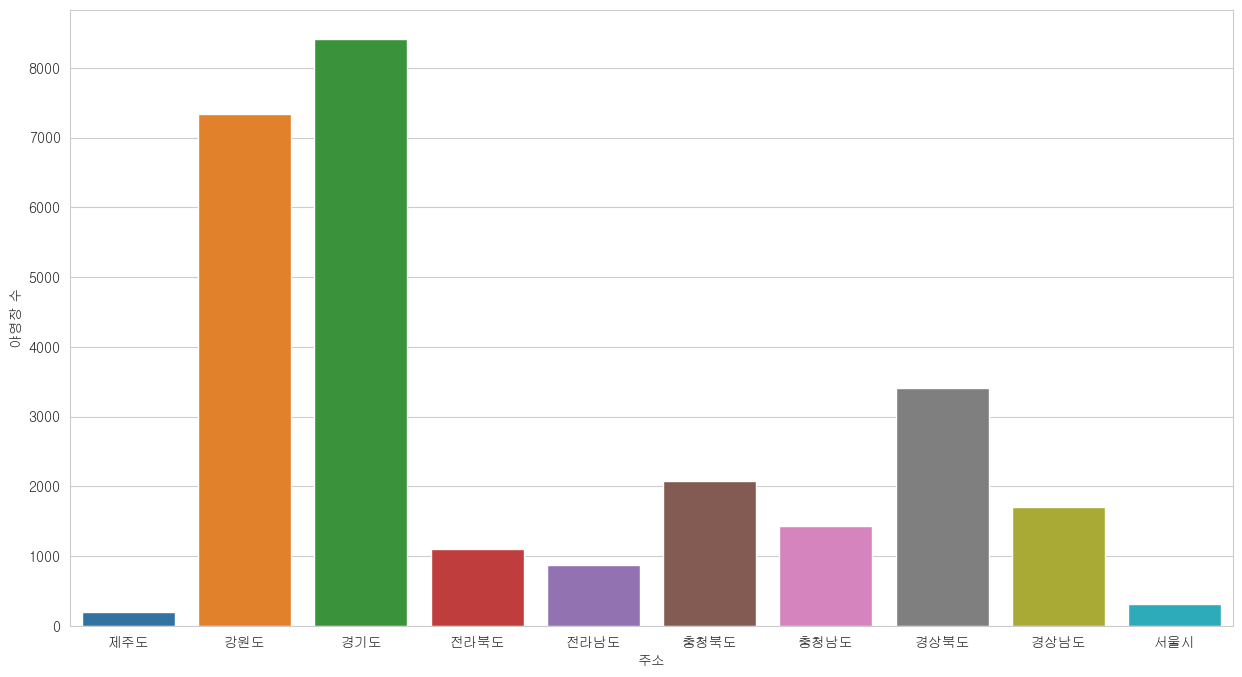

In [105]:

plt.figure(figsize=(15,8))
sns.barplot(data = frame,
           x ="주소",
           y ="일반야영장수")

plt.xlabel('주소')
plt.ylabel('야영장 수')

plt.show()